In [1]:
# Import the libraries
import numpy as np
import matplotlib.pyplot as plt
import glob
import cv2
import tensorflow
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.activations import sigmoid,relu


**Datasets Path**

In [2]:
Gender_datasets='/content/drive/MyDrive/cnn/gender_detection'

**Train data and Test data path**

In [3]:
train_data_path='/content/drive/MyDrive/cnn/gender_detection/Train/Train'

In [4]:
test_data_path='/content/drive/MyDrive/cnn/gender_detection/Test/Test'

**Import the train and test path**

In [5]:
from glob import glob
glob('/content/drive/MyDrive/cnn/gender_detection/Train/Train/*')

['/content/drive/MyDrive/cnn/gender_detection/Train/Train/Female',
 '/content/drive/MyDrive/cnn/gender_detection/Train/Train/Male']

In [6]:
from glob import glob
glob('/content/drive/MyDrive/cnn/gender_detection/Test/Test/*')

['/content/drive/MyDrive/cnn/gender_detection/Test/Test/Male',
 '/content/drive/MyDrive/cnn/gender_detection/Test/Test/Female']

Set the fixed size so while model ist easy to understand

In [7]:
gender_width,gender_height=100,100

**Preprocess the Train and test images**



*   ImageDataGenerator is used for getting the input of the original data and it makes the transformation of this data on a random basis and gives the output resultant
*  rescale-scaling the image 0-1 range
*   Shearing deals with changing the shape and size of the 2D object along x-axis and y-axis




In [8]:
Train_data_preprocess=ImageDataGenerator(rescale=1./255,shear_range=0.2,horizontal_flip=True,zoom_range=0.2)

In [9]:
Test_data_preprocess=ImageDataGenerator(rescale=1./255)

**Take the lables**

In [10]:
labels=['Female','Male']

**NOW assign the Train data and Test data for architecture**

In [11]:
Train_data=Train_data_preprocess.flow_from_directory(train_data_path,target_size=(gender_width,gender_height),classes=labels,class_mode='binary',batch_size=35)

Found 11147 images belonging to 2 classes.


In [12]:
Test_data=Test_data_preprocess.flow_from_directory(test_data_path,target_size=(gender_width,gender_height),classes=labels,class_mode='binary',batch_size=35)

Found 1224 images belonging to 2 classes.


**Bulid the Architecture**

In [13]:
model=Sequential()#inital steps for building architecture
model.add(Conv2D(160,kernel_size=(3,3),input_shape=(gender_height,gender_width,3),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(130,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(90,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(60,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())#1D array
#1D data give to ANN
model.add(Dense(32,activation='relu'))# hidden layer 1
model.add(Dense(8,activation='relu'))# hidden layer 2
model.add(Dense(1,activation='sigmoid'))# Output layer

**data has given to architecture**



In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 160)     4480      
                                                                 
 max_pooling2d (MaxPooling2  (None, 50, 50, 160)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 130)       187330    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 25, 25, 130)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 25, 25, 90)        105390    
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 12, 12, 90)        0

In [15]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['Accuracy'])

In [17]:
model.fit(Train_data,epochs=5)

Epoch 1/5
319/319 [==============================] - 74s 232ms/step - loss: 0.2452 - Accuracy: 0.9007
Epoch 2/5
319/319 [==============================] - 71s 222ms/step - loss: 0.2344 - Accuracy: 0.9071
Epoch 3/5
319/319 [==============================] - 66s 208ms/step - loss: 0.2172 - Accuracy: 0.9115
Epoch 4/5
319/319 [==============================] - 66s 207ms/step - loss: 0.2152 - Accuracy: 0.9150
Epoch 5/5
319/319 [==============================] - 66s 207ms/step - loss: 0.2033 - Accuracy: 0.9207


In [18]:
Training_accuracy=model.history.history['Accuracy']
Training_loss=model.history.history['loss']

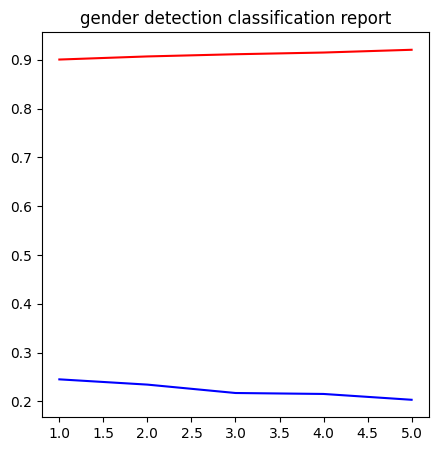

In [20]:
plt.figure(figsize=(5,5))
plt.plot(np.arange(1,6),Training_accuracy,color='r',label='Acuuracy')
plt.plot(np.arange(1,6),Training_loss,color='b',label='loss')
plt.title('gender detection classification report')
plt.show()

Lets take the female or male image and check it

[[[0.32941177 0.3254902  0.3372549 ]
  [0.7176471  0.74509805 0.8039216 ]
  [0.85882354 0.89411765 0.9372549 ]
  ...
  [0.5568628  0.5568628  0.5647059 ]
  [0.43529412 0.43529412 0.44313726]
  [0.5294118  0.5294118  0.5294118 ]]

 [[0.31764707 0.31764707 0.3254902 ]
  [0.70980394 0.73333335 0.7921569 ]
  [0.85490197 0.8901961  0.93333334]
  ...
  [0.5568628  0.5568628  0.5647059 ]
  [0.43529412 0.43529412 0.44313726]
  [0.5254902  0.5254902  0.5254902 ]]

 [[0.30588236 0.30588236 0.3137255 ]
  [0.69803923 0.72156864 0.78039217]
  [0.85490197 0.8901961  0.93333334]
  ...
  [0.54901963 0.54901963 0.5568628 ]
  [0.42745098 0.42745098 0.43529412]
  [0.52156866 0.52156866 0.5254902 ]]

 ...

 [[0.8156863  0.83137256 0.87058824]
  [0.8156863  0.83137256 0.87058824]
  [0.8156863  0.83137256 0.87058824]
  ...
  [0.04705882 0.05098039 0.05882353]
  [0.04705882 0.05098039 0.05882353]
  [0.05882353 0.0627451  0.07058824]]

 [[0.81960785 0.8352941  0.88235295]
  [0.81960785 0.8352941  0.88235295]


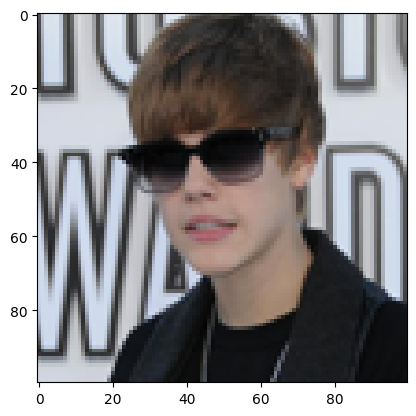

In [22]:
gender_image=plt.imread('/content/drive/MyDrive/cnn/gender_detection/Train/Train/Male/1082.png')
print(gender_image)
print(gender_image.shape)
plt.imshow(gender_image)

In [25]:
import cv2
def gender_prediction(path):
  gender_image=cv2.imread(path)
  print('orginal size:',gender_image.shape)
  # set the same size on training data
  gender_image=cv2.resize(gender_image,(100,100))
  print('image size:',gender_image.shape)
  # scale the image with the range 0-1
  gender_image=np.array((gender_image)/250.0)
  # convert data to deep learning CNN manner
  gender_image=np.expand_dims(gender_image,axis=0)
  print(gender_image.shape)
  result=model.predict(gender_image)
  print(result)
  if result[0][0]>0.5:
    print("this image is male")
  else:
    print("this image is female")
  images=plt.imread(path)
  plt.imshow(images)

orginal size: (100, 100, 3)
image size: (100, 100, 3)
(1, 100, 100, 3)
1/1 [==============================] - 0s 284ms/step
[[0.8949436]]
this image is male


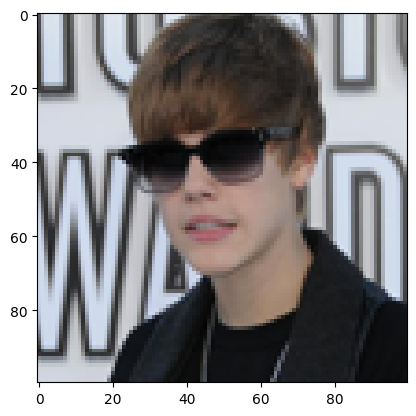

In [26]:
gender_prediction('/content/drive/MyDrive/cnn/gender_detection/Train/Train/Male/1082.png')

orginal size: (100, 100, 3)
image size: (100, 100, 3)
(1, 100, 100, 3)
1/1 [==============================] - 0s 23ms/step
[[0.0094004]]
this image is female


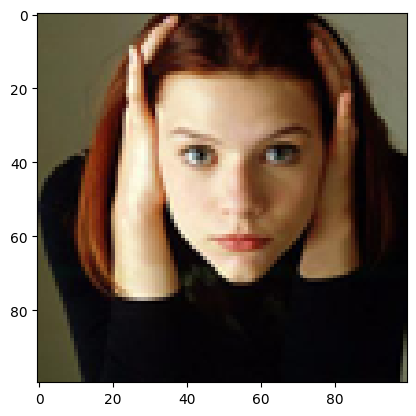

In [27]:
gender_prediction('/content/drive/MyDrive/cnn/gender_detection/Train/Train/Female/19.png')

orginal size: (100, 100, 3)
image size: (100, 100, 3)
(1, 100, 100, 3)
1/1 [==============================] - 0s 30ms/step
[[0.28264332]]
this image is female


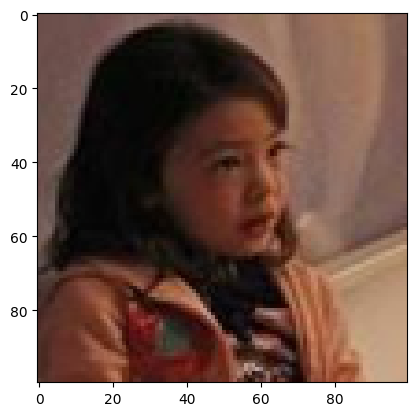

In [28]:
gender_prediction('/content/drive/MyDrive/cnn/gender_detection/Train/Train/Female/2199.png')